In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
ev_data = pd.read_csv('/Users/ngating/Desktop/Data engineer project/Electric_Vehicle_Population_Data.csv')

In [6]:
ev_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [7]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [8]:
ev_data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,177861.000000,177866.000000,177866.000000,177866.000000,177477.000000,1.778660e+05,1.778610e+05
mean,98172.453506,2020.515512,58.842162,1073.109363,29.127481,2.202313e+08,5.297672e+10
std,2442.450668,2.989384,91.981298,8358.624956,14.892169,7.584987e+07,1.578047e+09
min,1545.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.814743e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.282522e+08,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.548445e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [9]:
ev_data.isna().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [10]:
ev_data_clean = ev_data.dropna()

In [11]:
ev_data_clean.isna().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

# Objective of the project 
## The Population of Electric Vehicle Over The Years
### - The growth of the Electric Vehicle by years
### - The Market Share of the Electric Vehicle among brand
### - Discover the number of Electric Vehicle among the State
### - Predict the growth of the Electric Vehicle makret

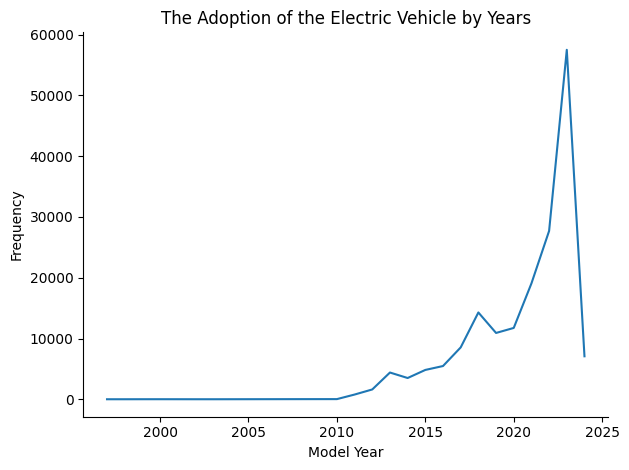

FileNotFoundError: [Errno 2] No such file or directory: '/Users/ngating/data analysis/images/ev_growth_by_year.png'

<Figure size 640x480 with 0 Axes>

In [12]:
model_year_counts = ev_data_clean['Model Year'].value_counts().sort_index()
ax = model_year_counts.plot(kind='line')
plt.title('The Adoption of the Electric Vehicle by Years')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.tight_layout()
ax.spines[['right', 'top']].set_visible(False)
plt.show()
plt.savefig('images/ev_growth_by_year.png')
plt.close()
#sort_index() means the index(e.g 2011,2012,2013) will present in ascending order, 
#if it is used in the index of brand, the brand name will be arranged in ascending order as well


In [ ]:
Make = 'TESLA'
highlight_color = 'red'
non_highlight_color = 'skyblue'
Make_counts = ev_data_clean['Make'].value_counts().head(10).sort_values(ascending=True)
colors = [highlight_color if make == 'TESLA' else non_highlight_color for make in Make_counts.index]

ax = Make_counts.plot(kind='barh', color=colors)

plt.title('Market Share of the Electric Vehicle by Brands')
plt.xlabel('Frequency')
plt.ylabel('Make')
plt.tight_layout()
ax.spines[['right', 'top']].set_visible(False)
plt.show()

In [ ]:
Make = 'Seattle'
highlight_color = 'red'
non_highlight_color = 'skyblue'

City_counts = ev_data_clean['City'].value_counts().head(20)
colors = [highlight_color if make == 'Seattle' else non_highlight_color for make in City_counts.index]

ax = City_counts.plot(kind='bar',color=colors)
plt.title('The Adoption of Electric Vehicle among City')
plt.xlabel('City')
plt.ylabel('Frequency')
ax.spines [['right', 'top']].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
ax = sns.histplot(ev_data_clean['Electric Range'],kde=True, bins=20, color= 'skyblue') 

plt.title('The Adoption of Electric Vehicle among City')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
ax.spines [['right', 'top']].set_visible(False)
plt.axvline(ev_data_clean['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_data_clean["Electric Range"].mean():.2f} miles')
plt.tight_layout()
plt.show()

In [ ]:
ev_data_clean.loc[ev_data_clean['Model Year'] ==2024].sum

In [ ]:
ev_data_predict = ev_data_clean.loc[ev_data_clean['Model Year'] < 2024]

In [ ]:
model_year_counts = ev_data_clean['Model Year'].value_counts().sort_index()
ax = model_year_counts.plot(kind='line')
plt.title('The Adoption of the Electric Vehicle by Years')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.tight_layout()
ax.spines[['right', 'top']].set_visible(False)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model_year_counts = ev_data_clean['Model Year'].value_counts().sort_index()
model_year_series = pd.Series(model_year_counts)
model_year_series = model_year_series.reset_index()
model_year_series.columns = ['Model Year', 'Count']
print(model_year_series)

In [ ]:
# Convert the years into numerical values
X = model_year_series['Model Year'].values.reshape(-1, 1)
y = model_year_series['Count'].values
print(X)
print(y)

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict future values (e.g., next 5 years)
future_years = np.arange(2024, 2029).reshape(-1, 1)
predictions = model.predict(future_years)

# Calculate the predicted values for the training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(model_year_series['Model Year'], model_year_series['Count'], label='Observed', color='blue')
plt.plot(X_train, y_train_pred, label='Train Prediction', color='green')
plt.plot(X_test, y_test_pred, label='Test Prediction', color='orange')
plt.plot(future_years, predictions, label='Future Predictions', color='red', linestyle='dashed')
plt.title('The Adoption of Electric Vehicle by Years')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# Print the mean squared error and r-squared for model evaluation
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f'Mean Squared Error (Train): {mse_train}')
print(f'Mean Squared Error (Test): {mse_test}')
print(f'R-squared:{r2}') 